### Class: Machine Learning <br> Date: 11/02/2018 <br> Mini-Project 2

### Members:
__Thomas Henderson__<br>
__Travis Hills__<br>
__Lucas Rufo__<br>
__Kyle Thomas__<br>

## Reading and Splitting the Data

In the cell below, a majority of the necessary libraries used in this project are imported The most important one is SVC, which enables Support Vector Classification with C-parameter support. The C parameter determines how strictly the SVM avoids misclassifying data points. A large number implies that the SVM model will select the smallest possible margin that contains all data points. A small number causes the SVM model to select the larger margins at the cost of a few misclassifications. The smaller or larger the value, the greater the effects will be.

The first step in data processing is to read in and split the data. The data set as provided did not include feature names for each column, so they were added manually in order to make dropping data easy. There were attemps to use iloc and loc functions to separate out the data set into labels and corresponding data, but these attemps resulted in the first row being completely ignored. With the feature names added, columns could easily be copied or dropped with little impedance.

Lastly, the data was split into training and testing sets. The general rule of thumb, according to the course material thus far has been to reserve 80% of the data for training and 20% for testing. To expedite tthis process, SciKit's train_test_split function was used.

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
plt.rcParams["axes.grid"] = False


# Read in the data using Pandas

data = pd.read_csv("data/bezdekIris.csv")

# Separate lables and data
########## The labels used below have been added to the CSV file manually. Using loc and iloc 
########## seemed to fail in getting every sample, as the first was interpreted as the name of the column.

y = data["Class"].copy()
X = data.drop(["SW", "SL", "Class"], axis=1)

# Split the data into training and test sets. 
# By the 80-20 rule, 80% of the data is for training and 20% is reserved for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Data Pipelines

Next, we implement a data pipeline to handle the data and preform the operations on the data all at once. This step allows for simplicity when handling data and when trying to change data sets.

Here you can see we are preforming the StandardScaler() function on the used dataset. This function will normalize the data so that its distribution will have a mean value of 0 and a standard deviation of 1. This is a necessary step when trying to use features of different scale or units. StandardScaler allows these different features to be scaled appropriately so they can be used in a machine learning context.



In [10]:
# Data has been split. 
# There are no null entires.
# Normalize data if needed.
# Train SVM models and compare them

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="linear", C=1))
    ])
svm_clf.fit(X_train, y_train)

# Make predictions
test_pred = svm_clf.predict(X_test)    # Parameters are petal length, petal width

## Computing the Confusion Matrix and Evaluation Metrics

With the SVM classifier trained and predictions made, it was time to evaluate the model's perfomance. Two functions, plot_confusion_matrix and evaluate, were written to automate the evaluation task. plot_confusion_matrix takes advantage of the seaborn library to generate a heatmap that clearly indicates the model's success. In the confusion matrix shown below, the y-axis represents the labels of the set, while the x-axis represents the predicted values. The diagonal represents correct predictions. Other non-zero matrix elements are incorrect predictions.

With a linear kernel and C parameter of 1, the SVM classifier is fairly accurate. It only misclassifies two cases. Additionally, the precision, recall, and F1-score are all close to 1, at around 0.9. Thus, this model has a low false positive rate, high sensitivity, and great overal rating. For simplicity, the precision_score, recall_score, and f1_score functions were used to calculate these values, as each function could be fed the labels and predictions the comprise the entirety of the confusion matrix. This prevented the tedium of changing true positive, false positive, and false negative values when changing the score type. The macro parameter calculate the metric for each label and then finds the unweighted mean.

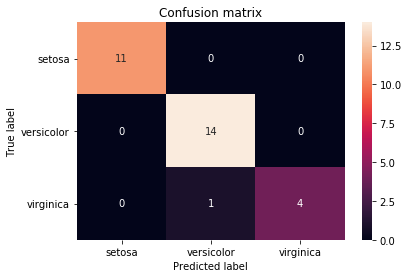

precision: 0.9688888888888889
recall: 0.9666666666666667
f1-score: 0.965389527458493


In [12]:
# Trained linear SVM Classifier
# Now evaluate predictions using the confusion matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns

# List containing names of flowers. Used when plotting confusion matrix.
class_names = ['setosa', 'versicolor', 'virginica']

# Plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.title(title)
    ax = sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)

# Calculate confusion matrix, plot it, and calculate precision; recall, and f1-score.
def evaluate(test_labels, pred):
    confusionMat = confusion_matrix(test_labels, pred)
    plot_confusion_matrix(confusionMat, classes=class_names, title='Confusion matrix')
    plt.show()

    # Compute the precision
    precision = precision_score(test_labels, pred, average="weighted")
    recall = recall_score(test_labels, pred, average="weighted")
    f1 = f1_score(test_labels, pred, average="weighted")
    print("precision: " + str(precision))
    print("recall: " + str(recall))
    print("f1-score: " + str(f1))


evaluate(y_test, test_pred)

### GridSearch

Here we preform grid search. To help us get the best c and gamma parameters. Grid search is able to take the data parameters in multiple instances of training and tests set and fit to our model many times to help tune the model based on C, gamma, and kernel values.

We are using a Support Vector Machine as the driving model. For our SVC we are using a linear kernel and a C parameter of 1. This way we should see an ability to classify correctly and allow outliers to be disregarded and not greatly affect the model. 

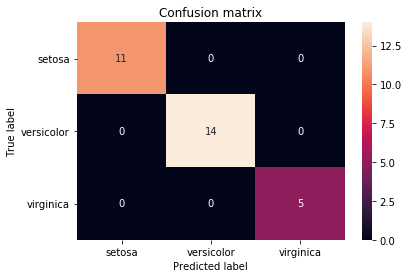

precision: 1.0
recall: 1.0
f1-score: 1.0


In [13]:
# Original predictions have been made.
# Now perform grid search to find the optimal C and gamma parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grid = [{'kernel': ['linear'], 'gamma': [1e-3, 1e-4],
                'C': [1, 10, 100, 1000]}]


grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

# Predict with newly trained model
grid_test_pred = grid.predict(X_test)

# Evaluate
evaluate(y_test, grid_test_pred)

|Member| Code          | Documentation | Presentation  |
|:------------:| :------------:|:-------------:|:-------------:|
| Lucas Rufo   | 25%           | 25%     | 25% |
| Travis Hill  | 25%           | 25%         |   25% |
| Thomas Henderson | 25%       | 25%            |    25 |
| Kyle Thomas | 25% | 25%                 |    25% |